*Nguyễn Phúc Minh Long - 18110137*
# Lab05 - Image Processing and Analysis

In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray

In [2]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    from matplotlib import pyplot as plt
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(nRows, nCols)
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        plt.subplot(nRows, nCols,i+1)
        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title("Image " + str(i))
        plt.axis('off')
    plt.show()

/home/ghjde/anaconda3/envs/ComputerVision/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


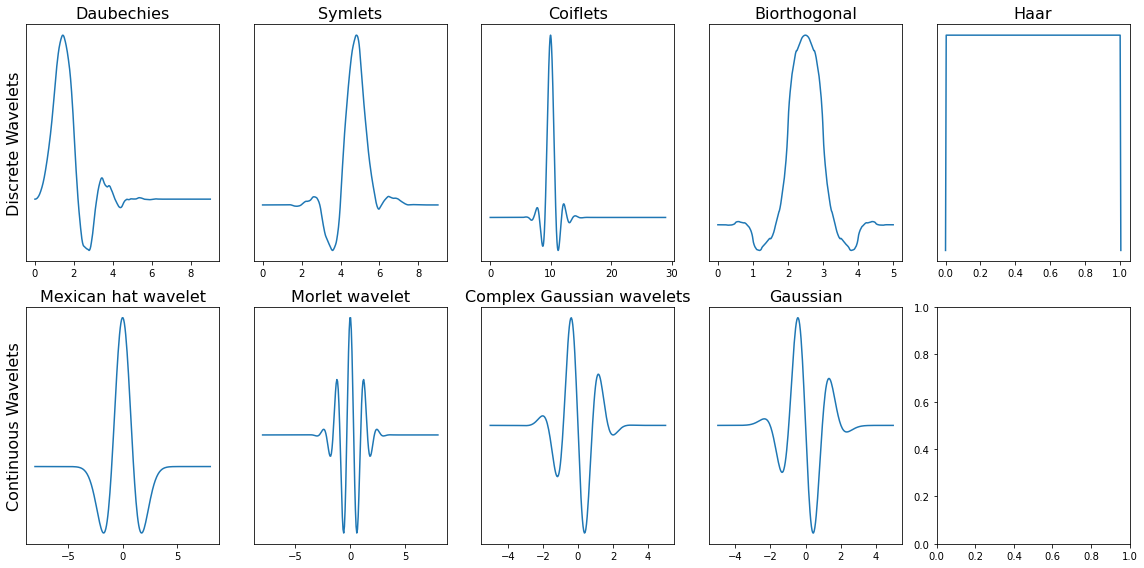

In [3]:
import pywt
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]

list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.show()

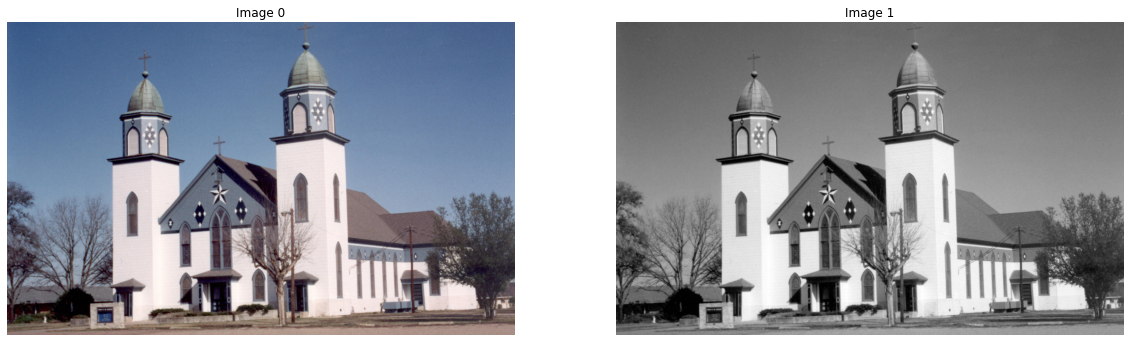

In [4]:
# Read Image
image_color = imread("Image/church.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

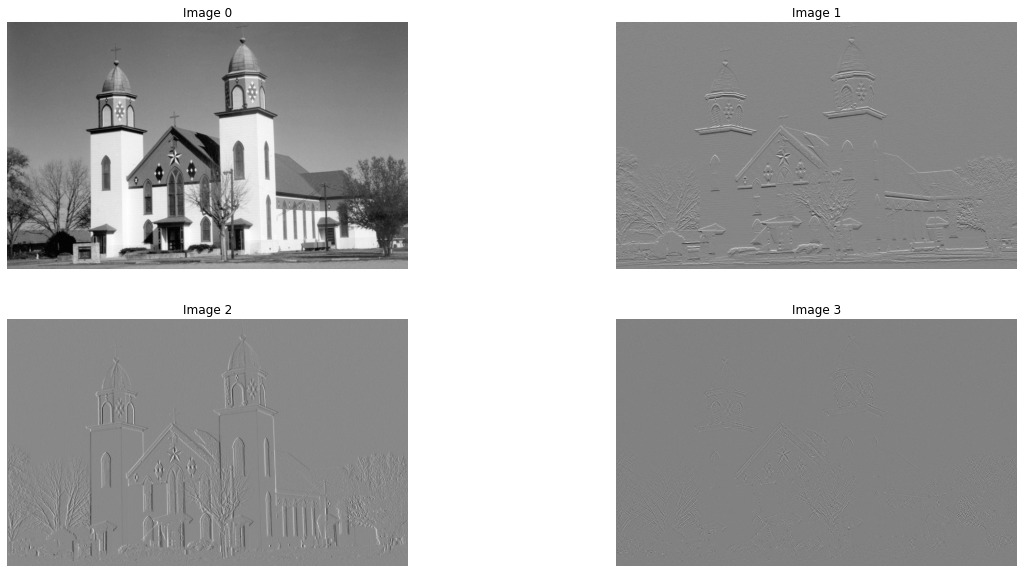

In [5]:
import pywt.data
from pywt import dwt2, idwt2
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
'Vertical detail', 'Diagonal detail']
coeffs2 = dwt2(image_gray, discrete_wavelets[3])
LL, (LH, HL, HH) = coeffs2
# Display Image
ShowImage([LL, LH, HL, HH], 2, 2)

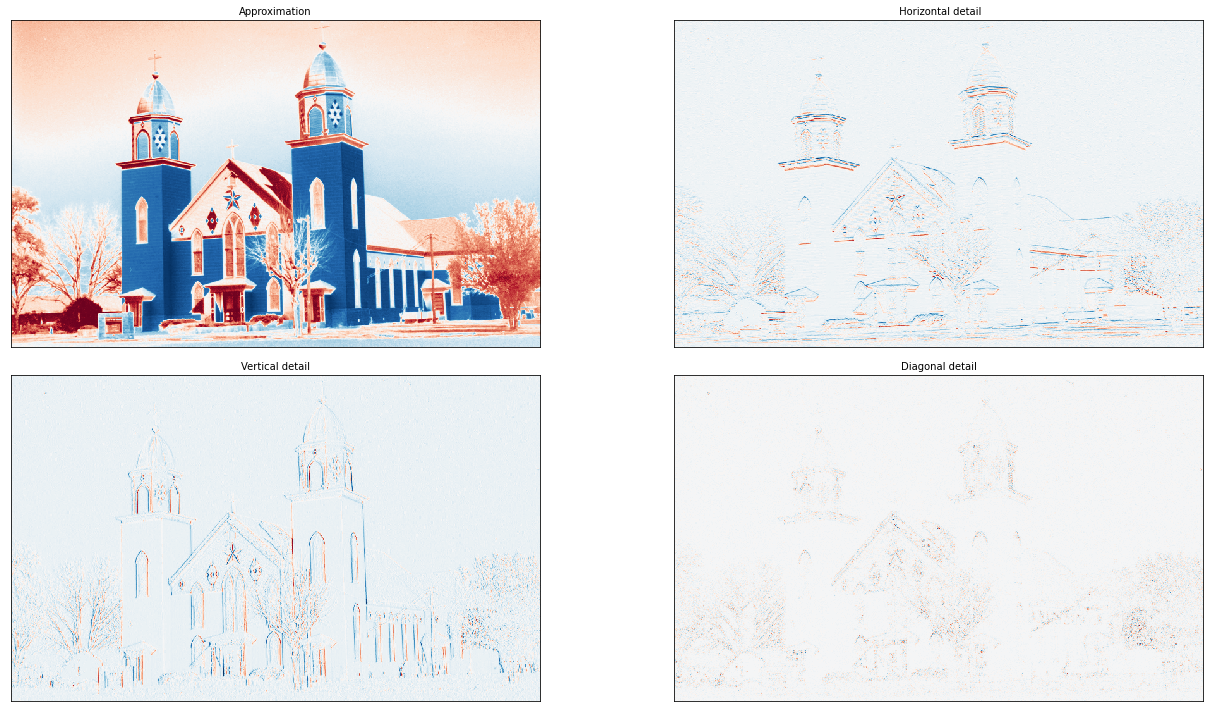

In [7]:
cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]

fig = plt.figure(figsize=(20,10))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=cmapList[5])
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

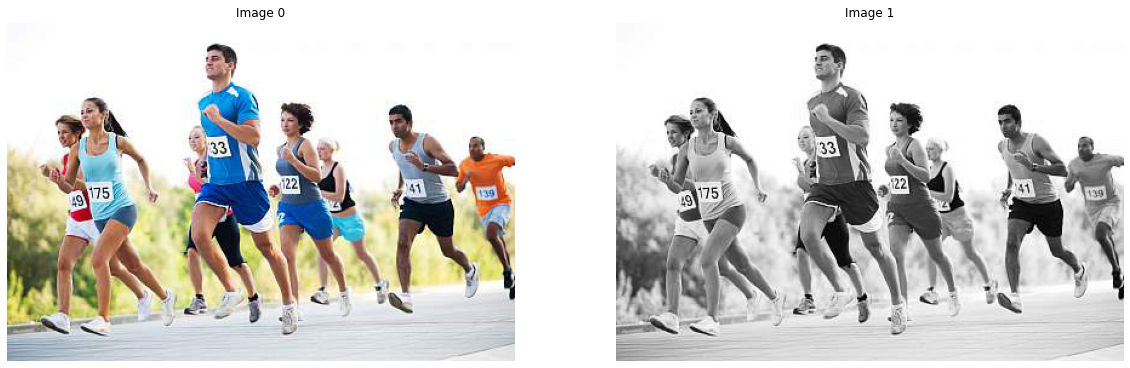

In [9]:
# Read Image

image_color = imread("Image/marathon.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

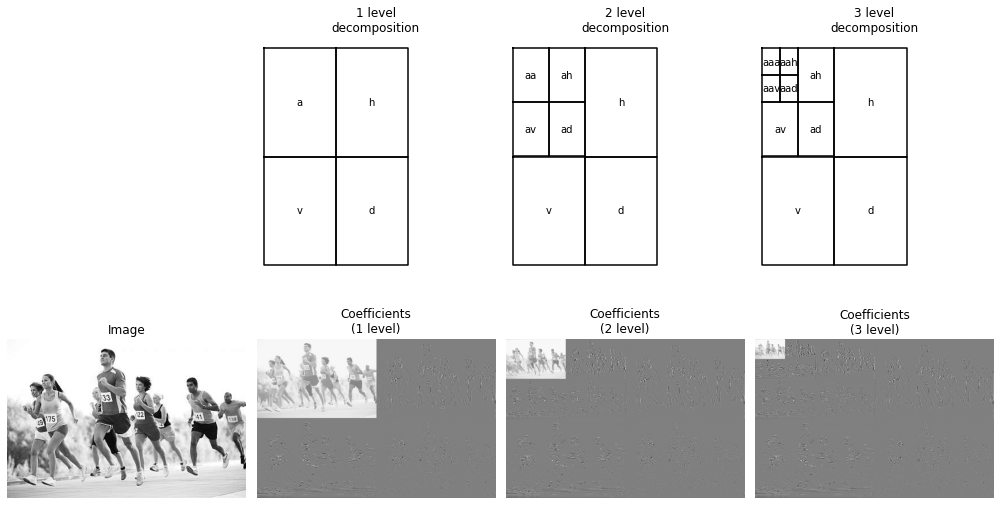

In [11]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis
x = image_gray.astype(np.float32)
shape = x.shape

max_lev = 3 # how many levels of decomposition to draw
label_levels = 3 # how many levels to explicitly label on the plots
fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue
    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
    label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))
    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()
plt.tight_layout()
plt.show()

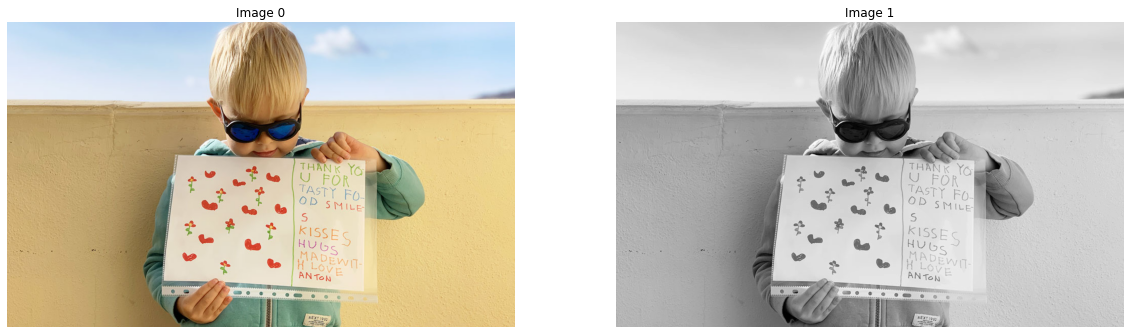

In [12]:
# Read Image

image_color = imread("Image/drawing.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


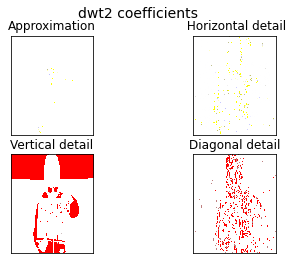

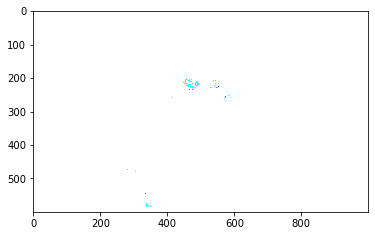

In [13]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(image_color, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure()
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle("dwt2 coefficients", fontsize=14)

# Now reconstruct and plot the original image
reconstructed = pywt.idwt2(coeffs2, 'bior1.3')
fig = plt.figure()
plt.imshow(reconstructed, interpolation="nearest", cmap=plt.cm.gray)

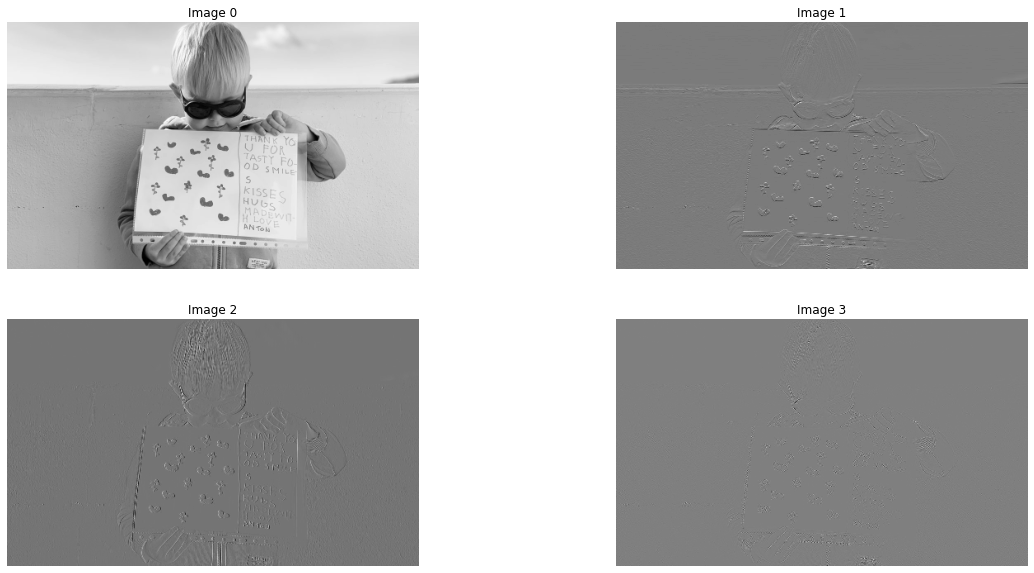

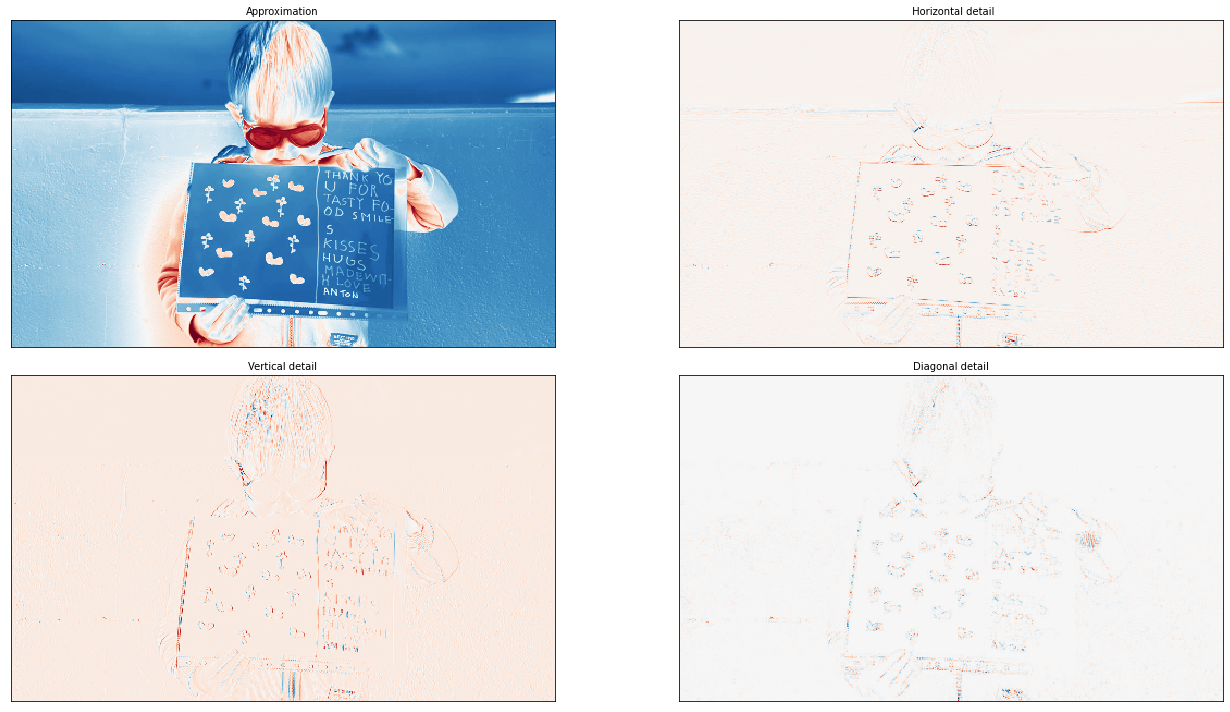

In [16]:
coeffs2 = dwt2(image_gray, discrete_wavelets[4])

LL, (LH, HL, HH) = coeffs2
# Display Image
ShowImage([LL, LH, HL, HH], 2, 2)
cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]
fig = plt.figure(figsize=(20,10))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=cmapList[5])
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

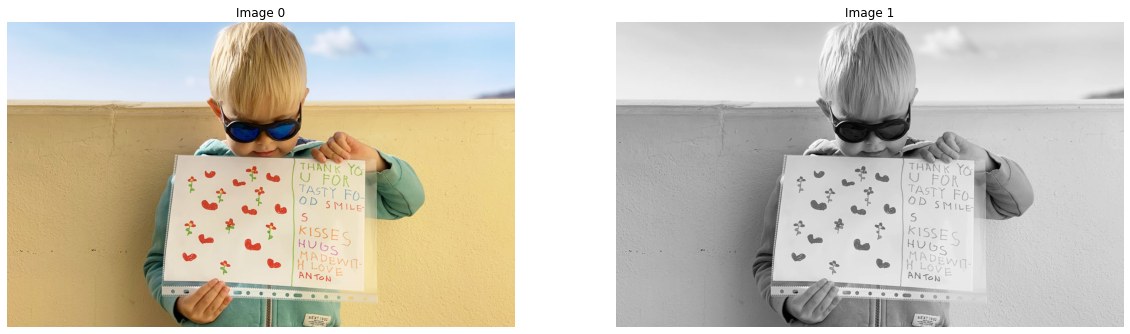

In [18]:
reconstructed = pywt.idwt2(coeffs2, discrete_wavelets[4])
ShowImage([image_color, reconstructed], 1, 2)